In [34]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import time
import wandb
import pytorch_lightning as pl

import FunctionCollection as fc
import importlib
fc = importlib.reload(fc)
import os
import sqlite3

In [35]:
path = r'/groups/hep/jonasv'

run_name = 'Muon_Angle_m21'

args = {'N_edge_feats': 6,
        'N_dom_feats': 7,
        'N_targets': 2,
        'N_outputs': 3,
        'N_metalayers': 1,
        'N_hcs': 64,
        'diagonal_cov': True,
        'wandb_activated': False,
        'type': 'Spherical_NLLH',
        'zenith': True,
        'id': '1b5u',#wandb.util.generate_id()[:4],
        'eps': 1e-5,
        'lr': 0.0209,
        'filename': 'dev_level2_mu_tau_e_muongun_classification_wnoise_unscaled.db',#dev_level7_mu_e_tau_oscweight_000.db #rasmus_classification_muon_3neutrino_3mio.db #dev_level7_oscNext_IC86_003.db
        'features': 'width, rqe, charge_log10, dom_time, dom_x, dom_y, dom_z',
        'targets': 'event_no, azimuth, zenith, energy_log10',
        'TrTV': (0,1,1)
       }

In [17]:
filepath = r"/groups/hep/pcs557/databases/dev_level2_mu_tau_e_muongun_classification_wnoise/data"

event_nos = pd.read_pickle(r"/groups/hep/jonasv/databases/Muon_event_nos_dev_level2_mu_tau_e_muongun_classification_wnoise_unscaled.pkl").sample(2000000)

In [36]:
centers = pd.DataFrame({'charge_log10': [-0.033858],
                        'dom_time': [10700.0],
                        'dom_x': [0],
                        'dom_y': [0],
                        'dom_z': [0],
                        'width': [4.5],
                        'rqe': [1.175]})
scalers = pd.DataFrame({'charge_log10': [0.274158],
                        'dom_time': [2699.0],
                        'dom_x': [300],
                        'dom_y': [300],
                        'dom_z': [300],
                        'width': [3.5],
                        'rqe': [0.175]})
centers = centers[args['features'].split(', ')].values
scalers = scalers[args['features'].split(', ')].values

def x_transform(df):
    df = (df - centers)/scalers
    return torch.tensor(df.values)

def y_transform(df):
    return torch.tensor(df.values)

dataset = fc.custom_db_dataset(filepath = filepath,
                               filename = args['filename'],
                               features = args['features'],
                               targets = args['targets'],
                               TrTV = args['TrTV'],
                               event_nos = event_nos.to_numpy().reshape(-1),
                               x_transform = x_transform,
                               y_transform = y_transform,
                               shuffle = False)

In [50]:
# train_loader, test_loader, val_loader = dataset.return_dataloaders(batch_size=512) #~0.6sec loading time pr. batch
data_loader = dataset.return_dataloader(dataset.test(),batch_size=1024, num_workers=32)

In [49]:
for i, data in enumerate(data_loader):
    fc.Print(i)

10:33:27 - 0
10:33:27 - 1
10:33:27 - 2
10:33:27 - 3
10:33:27 - 4
10:33:27 - 5
10:33:27 - 6
10:33:27 - 7
10:33:27 - 8
10:33:27 - 9
10:33:27 - 10
10:33:27 - 11
10:33:27 - 12
10:33:27 - 13
10:33:27 - 14
10:33:27 - 15
10:33:27 - 16
10:33:27 - 17
10:33:27 - 18
10:33:27 - 19
10:33:27 - 20
10:33:27 - 21
10:33:27 - 22
10:33:27 - 23
10:33:27 - 24
10:33:27 - 25
10:33:27 - 26
10:33:27 - 27
10:33:28 - 28
10:33:28 - 29
10:33:28 - 30
10:33:28 - 31
10:33:28 - 32
10:33:28 - 33
10:33:28 - 34
10:33:28 - 35
10:33:28 - 36
10:33:28 - 37
10:33:28 - 38
10:33:28 - 39
10:33:28 - 40
10:33:28 - 41
10:33:28 - 42
10:33:28 - 43
10:33:28 - 44
10:33:28 - 45
10:33:28 - 46
10:33:28 - 47
10:33:28 - 48
10:33:28 - 49
10:33:28 - 50
10:33:28 - 51
10:33:28 - 52
10:33:28 - 53
10:33:28 - 54
10:33:28 - 55
10:33:28 - 56
10:33:28 - 57
10:33:28 - 58
10:33:28 - 59
10:33:28 - 60
10:33:28 - 61
10:33:28 - 62
10:33:28 - 63
10:33:28 - 64
10:33:28 - 65
10:33:28 - 66
10:33:28 - 67
10:33:28 - 68
10:33:28 - 69
10:33:28 - 70
10:33:28 - 71
10

KeyboardInterrupt: 

In [51]:
import Model_Loaders.Model_21 as M
M = importlib.reload(M)

Net = M.Load_model(args['type'],args)
model = Net.load_from_checkpoint(path + '/checkpoints/' + run_name + '_' + args['id'] + '/' + run_name + '-epoch=0-Val Acc=0.034.ckpt')
model.to(torch.device('cuda'));

if features = x, Charge should be at x[:,-5], time at x[:,-4] and pos at x[:,-3:]
Remember all accuracies are positive and defined to go towards 0 in the optimal case.


In [52]:
pred, truth = fc.return_reco_truth(model,data_loader)

ib/python3.8/multiprocessing/process.py", line 160, in is_alive
Traceback (most recent call last):
  File "/groups/hep/jonasv/anaconda3/envs/newenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    assert self._parent_pid == os.getpid(), 'can only test a child process'    
self._shutdown_workers()AssertionError: 
can only test a child process  File "/groups/hep/jonasv/anaconda3/envs/newenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers

Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9a0065d550>if w.is_alive():

Traceback (most recent call last):
  File "/groups/hep/jonasv/anaconda3/envs/newenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
  File "/groups/hep/jonasv/anaconda3/envs/newenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
        assert self._parent_pid == os.getpid(), 'can only test a child process'self.

In [53]:
df_truth = pd.DataFrame(data=truth,columns=args['targets'].split(', '))
df_pred = pd.DataFrame(data=pred,columns=['azimuth_pred','zenith_pred','pred_sigma'])

In [54]:
tmp = df_pred.azimuth_pred.copy()+3.14
tmp[(tmp - df_truth.azimuth).abs() > np.pi] -= (tmp - df_truth.azimuth).apply(np.sign)*2*np.pi

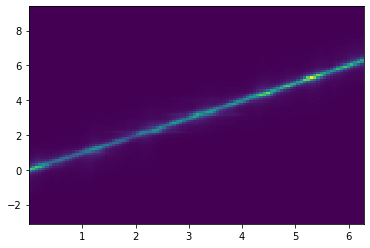

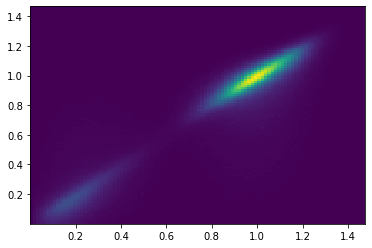

In [58]:
fig, ax = plt.subplots()
ax.hist2d(df_truth.azimuth, tmp, bins=100);

fig, ax = plt.subplots()
ax.hist2d(df_truth.zenith, (df_pred.zenith_pred+1.57).abs(), bins=100);

$$ \sqrt{-2\cdot ln\left(coth(\kappa) - \frac{1}{\kappa}\right)} $$

In [65]:
kappa = df_pred.pred_sigma**2 + args['eps']
sigma = np.sqrt(-2*np.log((1 + np.exp(-2*kappa))/(1 - np.exp(-2*kappa)) - 1/kappa))

In [67]:
def Omega(azp,zep,azt,zet):
    s1 = np.sin( zet + azt - azp )
    s2 = np.sin( zet - azt + azp )
    c1 = np.cos( zet - zep )
    c2 = np.cos( zet + zep )
    return np.arccos(0.5*np.abs(np.sin(zep))*( s1 + s2 ) + 0.5*(c1 + c2))*180/np.pi
solidA = Omega(df_pred.azimuth_pred+3.14,
               df_pred.zenith_pred,
               df_truth.azimuth,
               df_truth.zenith)

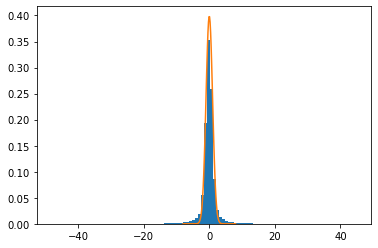

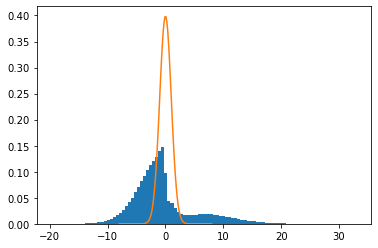

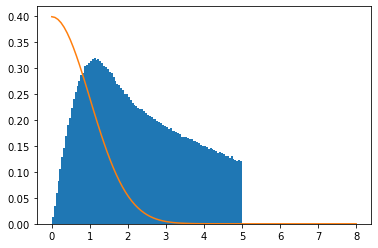

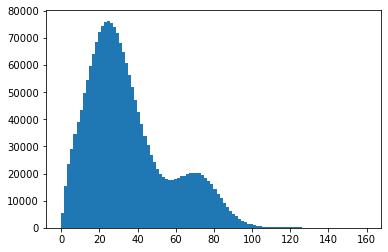

In [68]:
def gaussian(x, mu=0, sig=1):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / (sig*np.sqrt(2*np.pi))

fig, ax = plt.subplots()
ax.hist((tmp-df_truth.azimuth)/sigma,bins=100,density=True);
ax.plot(np.linspace(-8,8,100),gaussian(np.linspace(-8,8,100)))

fig, ax = plt.subplots()
ax.hist((df_pred.zenith_pred.abs()-df_truth.zenith)/sigma,bins=100,density=True);
ax.plot(np.linspace(-8,8,100),gaussian(np.linspace(-8,8,100)))

fig, ax = plt.subplots()
ax.hist((solidA)/(sigma*180/np.pi),bins=100,range=(0,5),density=True);
ax.plot(np.linspace(0,8,100),gaussian(np.linspace(0,8,100)))

fig, ax = plt.subplots()
ax.hist(solidA,bins=100);

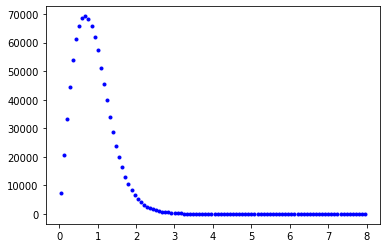

In [185]:
vals, binedges = np.histogram(solidA/sigma/180*np.pi,bins=100)
area = 2*(binedges[1:] - binedges[:-1])**2

fig,ax = plt.subplots()
ax.plot(0.5*(binedges[1:]+binedges[:-1]),vals,'b.')

In [69]:
print((solidA/(sigma*180/np.pi) <= 1).sum()/1e6, 0.682689)
print((solidA/(sigma*180/np.pi) <= 2).sum()/1e6, 0.954499)
print((solidA/(sigma*180/np.pi) <= 3).sum()/1e6, 0.997300)

0.267452 0.682689
0.667842 0.954499
0.961426 0.9973


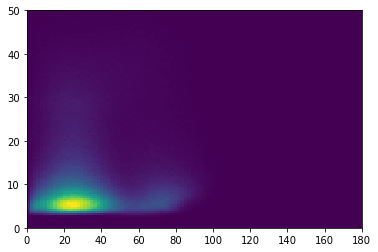

In [72]:
fig, ax = plt.subplots()
ax.hist2d(solidA,sigma*180/np.pi,bins=100,range=((0,180),(0,50)));

In [73]:
df_pred.azimuth_pred = tmp
df_pred.zenith_pred = (df_pred.zenith_pred+1.57).abs()
df_pred.pred_sigma = sigma

In [74]:
# df_truth = pd.DataFrame(data=truth,columns=args['targets'].split(', '))
# df_pred = pd.DataFrame(data=pred,columns=['azimuth_pred','zenith_pred','azimuth_pred_sigma','zenith_pred_sigma'])
pd.concat([df_truth,df_pred],axis=1).to_csv(r'~/predictions/Muon_Angle_m21_1b5u_2mio_Muongun_predictions.csv')

In [152]:
df = pd.concat([df_truth,df_pred],axis=1)

In [154]:
Os = Omega(df.azimuth_pred,df.zenith_pred,df.azimuth,df.zenith)
Osr = Omega(df.azimuth_retro,df.zenith_retro,df.azimuth,df.zenith)

In [157]:
Os

array([17.64694973, 41.60831578, 23.07280645, ..., 13.14382546,
       44.91365204, 53.06938751])

[8.41628713e-05 1.99237818e-01 3.98391474e-01 5.97545129e-01
 7.96698784e-01 9.95852440e-01 1.19500610e+00 1.39415975e+00
 1.59331341e+00 1.79246706e+00 1.99162072e+00 2.19077437e+00
 2.38992803e+00 2.58908168e+00 2.78823534e+00 2.98738899e+00
 3.18654265e+00 3.38569630e+00 3.58484996e+00 3.78400362e+00
 3.98315727e+00] 8.416287128459917e-05 3.98315727079662


C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\FunctionCollection.py:205: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\FunctionCollection.py:215: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


[8.41628713e-05 1.99237818e-01 3.98391474e-01 5.97545129e-01
 7.96698784e-01 9.95852440e-01 1.19500610e+00 1.39415975e+00
 1.59331341e+00 1.79246706e+00 1.99162072e+00 2.19077437e+00
 2.38992803e+00 2.58908168e+00 2.78823534e+00 2.98738899e+00
 3.18654265e+00 3.38569630e+00 3.58484996e+00 3.78400362e+00
 3.98315727e+00] 8.416287128459917e-05 3.98315727079662


C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\FunctionCollection.py:205: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\FunctionCollection.py:215: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


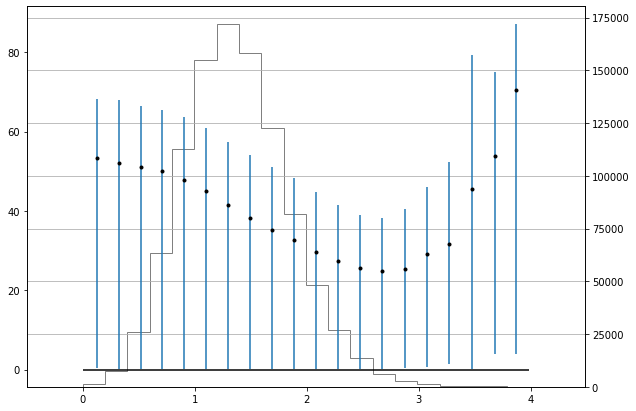

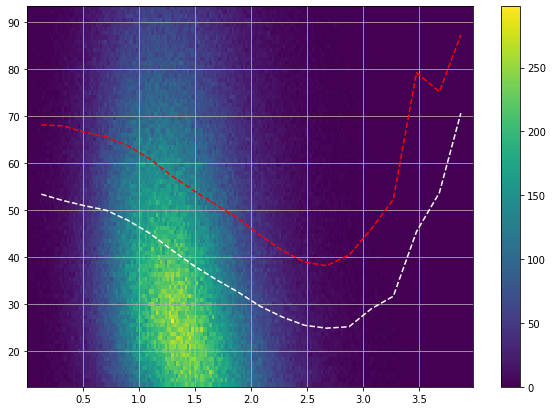

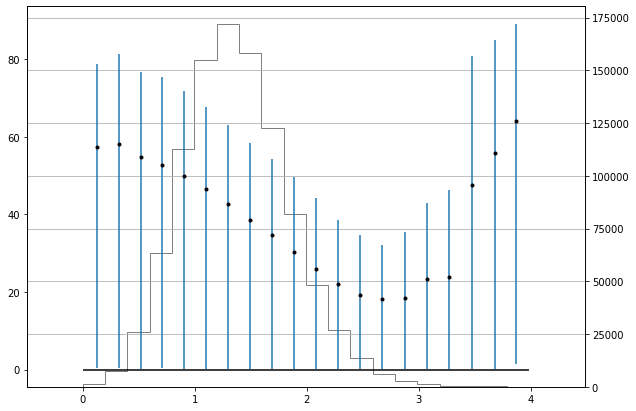

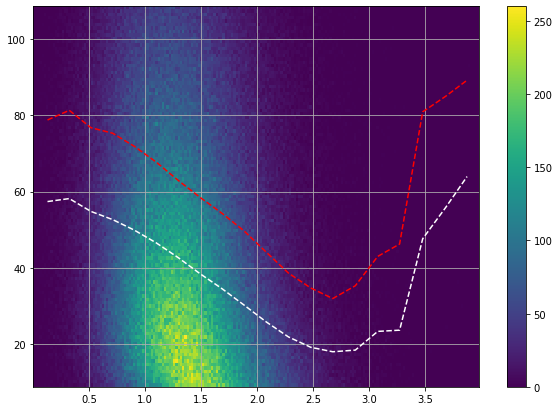

In [160]:
# fig, ax = plt.subplots()
# ax.hist2d()
q = fc.performance_plot(Os.to_numpy(),df.energy_log10.to_numpy(),bins=20,zero_bounded=True);
qr = fc.performance_plot(Osr.to_numpy(),df.energy_log10.to_numpy(),bins=20,zero_bounded=True);

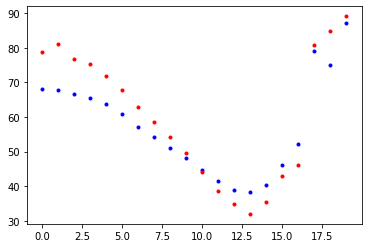

In [166]:
fig, ax = plt.subplots()
ax.plot(q[:,2],'b.',)
ax.plot(qr[:,2],'r.')

In [103]:
# wandb.finish()